# UIT 2502 Data Analytics and Visualization
# **Exercise - 2**
## Handling Outliers


---

Dataset : PIMA INDIAN DIABETIC DATASET

---



* 3122225002001 Abdullah Yassir A
* 3122225002012 Arun Kumar S
* 3122225002013 Ashuwin P



---



In [284]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [285]:
# Loading data as data frame
diabetic_df = pd.read_csv(r"D:\SEM5\DAV\DataRepo\diabetes.csv")
diabetic_df = diabetic_df.drop("Outcome", axis=1) # Categorical Feature
diabetic_df = diabetic_df.drop("Insulin", axis=1) # More Missing Values -- Not needed for this exercise

---

## *Handling Missing Values*

---

In [286]:
def fill_missing_Values(df, features):
    for feature in features:
        df[feature] = df[feature].replace(0, np.nan)
        print(f"{feature:<25}   :  {df[feature].isnull().sum()}")
        df[feature] = df[feature].replace(
            np.nan, df[feature].mean()
        )
    if (not(df.isnull().sum().any())):
        print("\nMissing Values filled Successfully\n")
    return not(df.isnull().sum().any())

In [287]:
fill_missing_Values(diabetic_df, diabetic_df.columns)

Pregnancies                 :  111
Glucose                     :  5
BloodPressure               :  35
SkinThickness               :  227
BMI                         :  11
DiabetesPedigreeFunction    :  0
Age                         :  0

Missing Values filled Successfully



True

---


## *Identifying Outliers Based on Z Score*


---

In [288]:
def outliers(df, feature):
    outliers = []
    mean_ = df[feature].mean()  
    sd_ = df[feature].std()    

    # Detect outliers
    for pt in df[feature]:
        z = (pt - mean_) / sd_
        if abs(z) >= 3:
            outliers.append(pt)
    
    return outliers

In [289]:
for feature in diabetic_df.columns:
    outliers_ = outliers(diabetic_df, feature)
    print(f"{feature:<25} :: Outliers ::   {outliers_}")

Pregnancies               :: Outliers ::   [15.0, 17.0, 14.0, 14.0]
Glucose                   :: Outliers ::   []
BloodPressure             :: Outliers ::   [30.0, 110.0, 122.0, 30.0, 110.0, 110.0, 24.0, 114.0]
SkinThickness             :: Outliers ::   [60.0, 56.0, 63.0, 99.0]
BMI                       :: Outliers ::   [53.2, 55.0, 67.1, 59.4, 57.3]
DiabetesPedigreeFunction  :: Outliers ::   [2.288, 1.893, 1.781, 2.329, 1.476, 2.137, 1.731, 1.6, 2.42, 1.699, 1.698]
Age                       :: Outliers ::   [69, 72, 81, 70, 69]


---



## *Identifying Outliers using IQR*



---

In [290]:
def IQR_outliers(df, feature):
    q1, q3 = df[feature].quantile(0.25), df[feature].quantile(0.75)
    IQR = q3-q1
    upper_bound = q3 + (1.5 * IQR)
    lower_bound = q1 - (1.5 * IQR)
    outliers = []
    for pt in df[feature]:
        if ((pt <= lower_bound) or (pt >= upper_bound)):
            outliers.append(pt)
    return outliers

In [291]:
for feature in diabetic_df.columns:
    outliers_ = IQR_outliers(diabetic_df, feature)
    print(f"{feature:<25} :: Outliers ::   {outliers_}")

Pregnancies               :: Outliers ::   [13.0, 13.0, 13.0, 15.0, 17.0, 12.0, 12.0, 13.0, 14.0, 13.0, 12.0, 13.0, 12.0, 12.0, 12.0, 14.0, 12.0, 13.0, 12.0, 13.0, 13.0, 13.0, 12.0]
Glucose                   :: Outliers ::   []
BloodPressure             :: Outliers ::   [40.0, 30.0, 110.0, 108.0, 122.0, 30.0, 110.0, 104.0, 108.0, 104.0, 110.0, 24.0, 38.0, 106.0, 106.0, 106.0, 114.0]
SkinThickness             :: Outliers ::   [45.0, 47.0, 11.0, 47.0, 11.0, 10.0, 60.0, 13.0, 13.0, 54.0, 51.0, 56.0, 14.0, 13.0, 50.0, 44.0, 12.0, 46.0, 44.0, 13.0, 44.0, 54.0, 14.0, 7.0, 50.0, 52.0, 10.0, 44.0, 43.0, 45.0, 14.0, 10.0, 11.0, 12.0, 43.0, 13.0, 12.0, 48.0, 43.0, 43.0, 8.0, 13.0, 14.0, 12.0, 49.0, 46.0, 46.0, 11.0, 8.0, 12.0, 63.0, 12.0, 45.0, 13.0, 48.0, 13.0, 10.0, 45.0, 7.0, 52.0, 49.0, 43.0, 14.0, 47.0, 99.0, 46.0, 11.0, 50.0, 45.0, 14.0, 13.0, 13.0, 47.0, 12.0, 48.0, 43.0, 46.0, 46.0, 45.0, 10.0, 46.0, 49.0, 11.0, 13.0, 46.0, 44.0, 48.0]
BMI                       :: Outliers ::   [53.2, 55

---


## *Imputing outliers by Median*


---

In [292]:
def handle_outliers(df, feature, outliers):
    # Plot before handling outliers
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    df[feature].plot.box(title=f'{feature} - Before Handling Outliers')
    
    # Replace outliers
    mean_ = df[feature].median()
    for idx, value in enumerate(df[feature]):
        if value in outliers:
            df.loc[idx, feature] = mean_

    # Plot after handling outliers
    plt.subplot(1, 2, 2)
    df[feature].plot.box(title=f'{feature} - After Handling Outliers')
    
    plt.tight_layout()
    plt.show()

    return 1


Pregnancies               :: Outliers ::   [13.0, 13.0, 13.0, 15.0, 17.0, 12.0, 12.0, 13.0, 14.0, 13.0, 12.0, 13.0, 12.0, 12.0, 12.0, 14.0, 12.0, 13.0, 12.0, 13.0, 13.0, 13.0, 12.0]


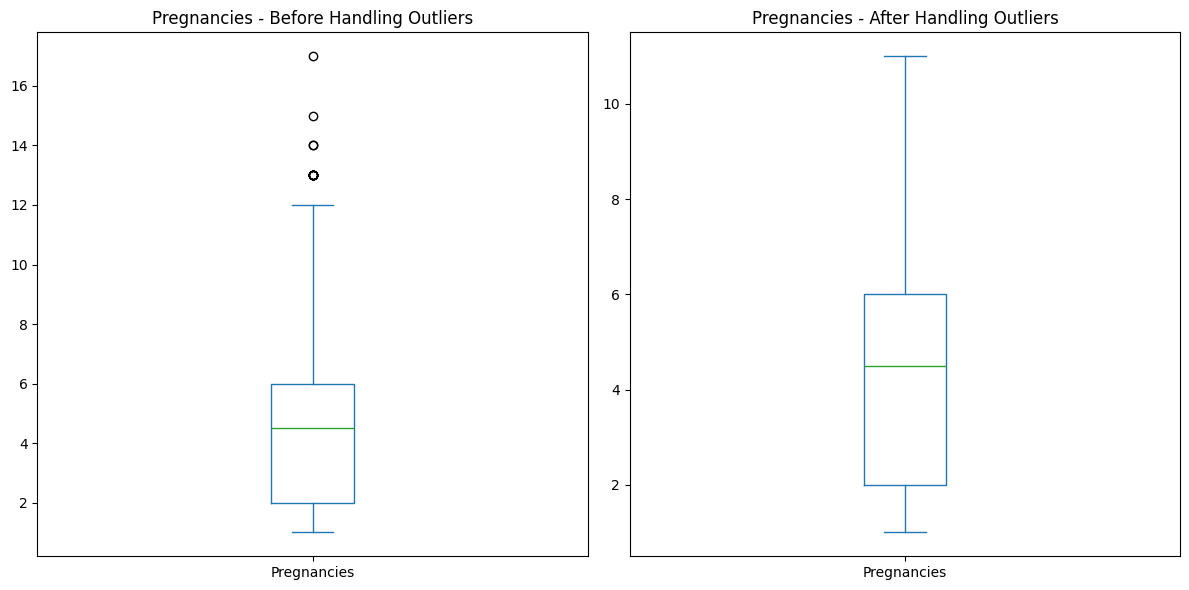

Glucose                   :: Outliers ::   []


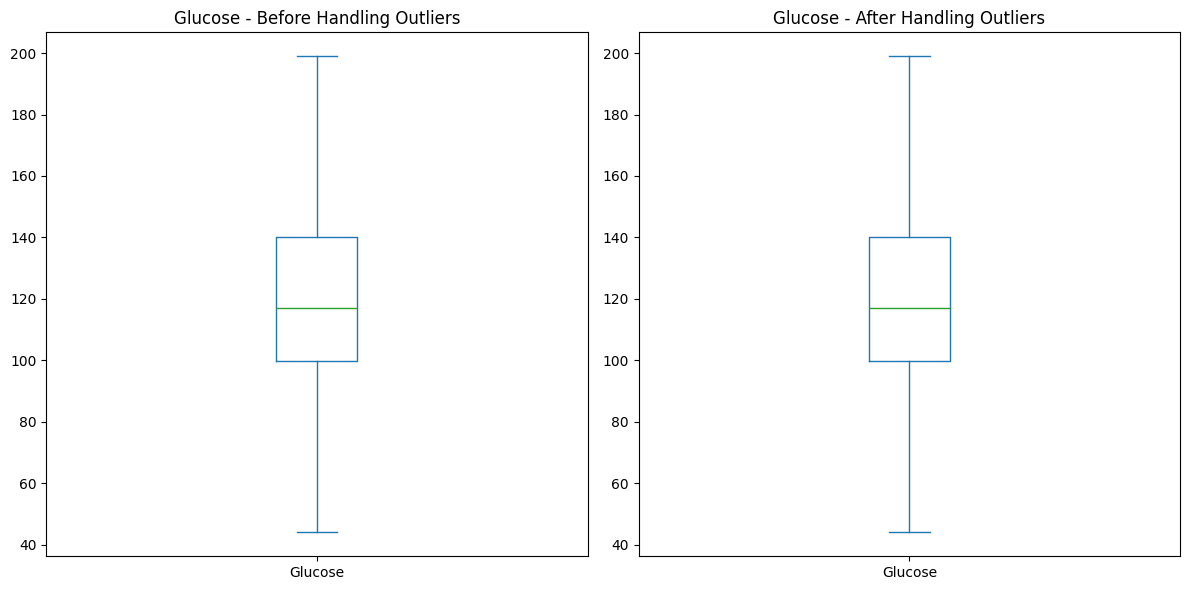

BloodPressure             :: Outliers ::   [40.0, 30.0, 110.0, 108.0, 122.0, 30.0, 110.0, 104.0, 108.0, 104.0, 110.0, 24.0, 38.0, 106.0, 106.0, 106.0, 114.0]


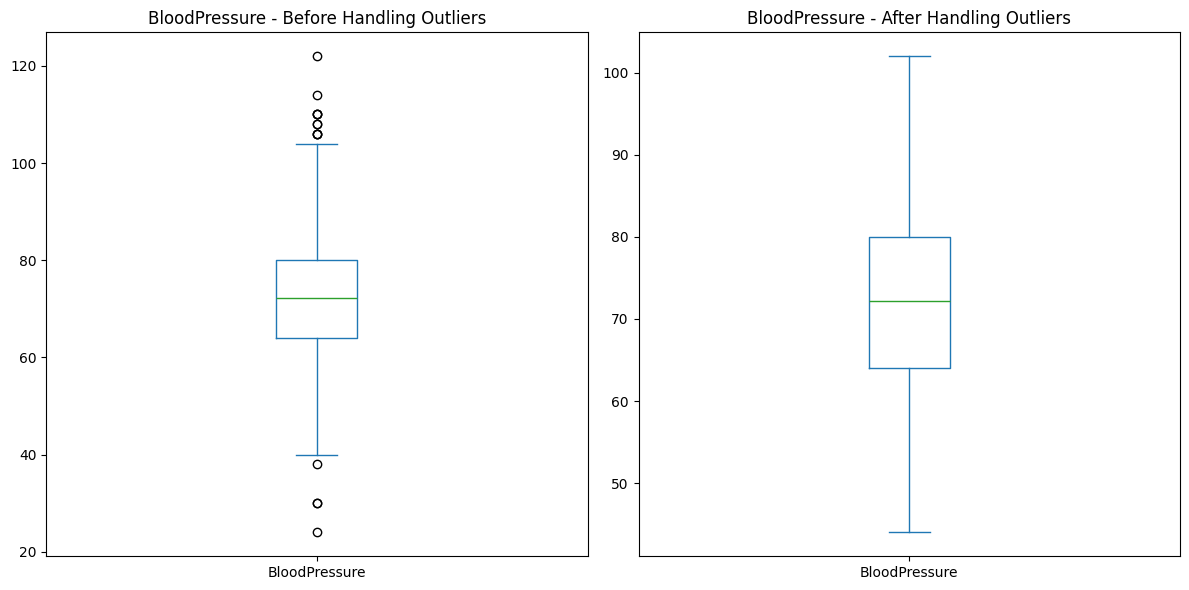

SkinThickness             :: Outliers ::   [45.0, 47.0, 11.0, 47.0, 11.0, 10.0, 60.0, 13.0, 13.0, 54.0, 51.0, 56.0, 14.0, 13.0, 50.0, 44.0, 12.0, 46.0, 44.0, 13.0, 44.0, 54.0, 14.0, 7.0, 50.0, 52.0, 10.0, 44.0, 43.0, 45.0, 14.0, 10.0, 11.0, 12.0, 43.0, 13.0, 12.0, 48.0, 43.0, 43.0, 8.0, 13.0, 14.0, 12.0, 49.0, 46.0, 46.0, 11.0, 8.0, 12.0, 63.0, 12.0, 45.0, 13.0, 48.0, 13.0, 10.0, 45.0, 7.0, 52.0, 49.0, 43.0, 14.0, 47.0, 99.0, 46.0, 11.0, 50.0, 45.0, 14.0, 13.0, 13.0, 47.0, 12.0, 48.0, 43.0, 46.0, 46.0, 45.0, 10.0, 46.0, 49.0, 11.0, 13.0, 46.0, 44.0, 48.0]


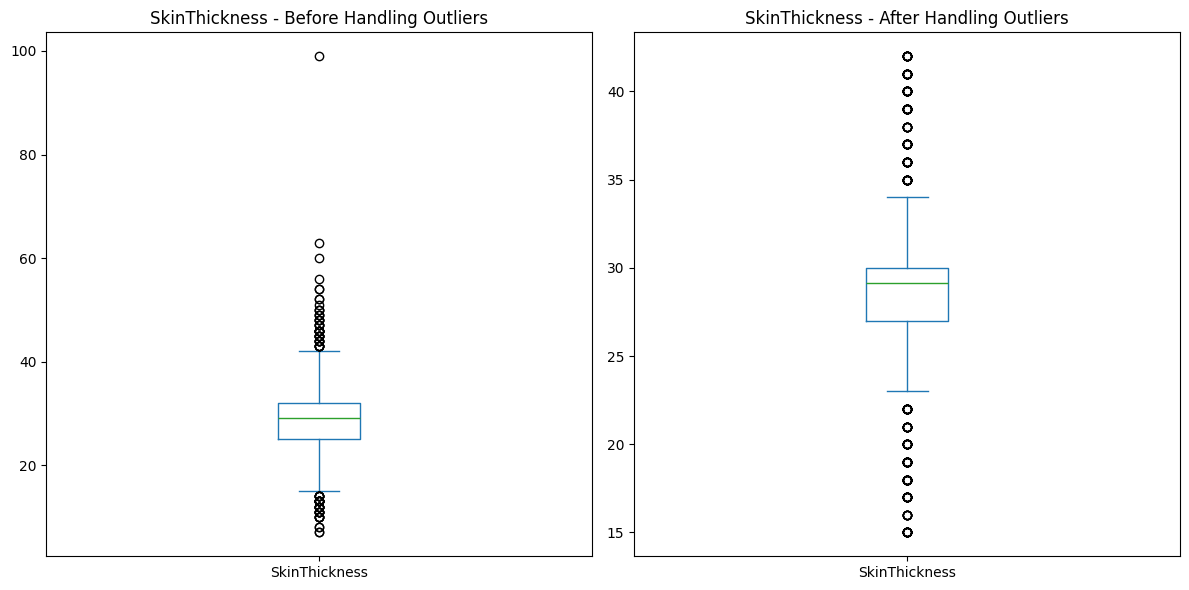

BMI                       :: Outliers ::   [53.2, 55.0, 67.1, 52.3, 52.3, 52.9, 59.4, 57.3]


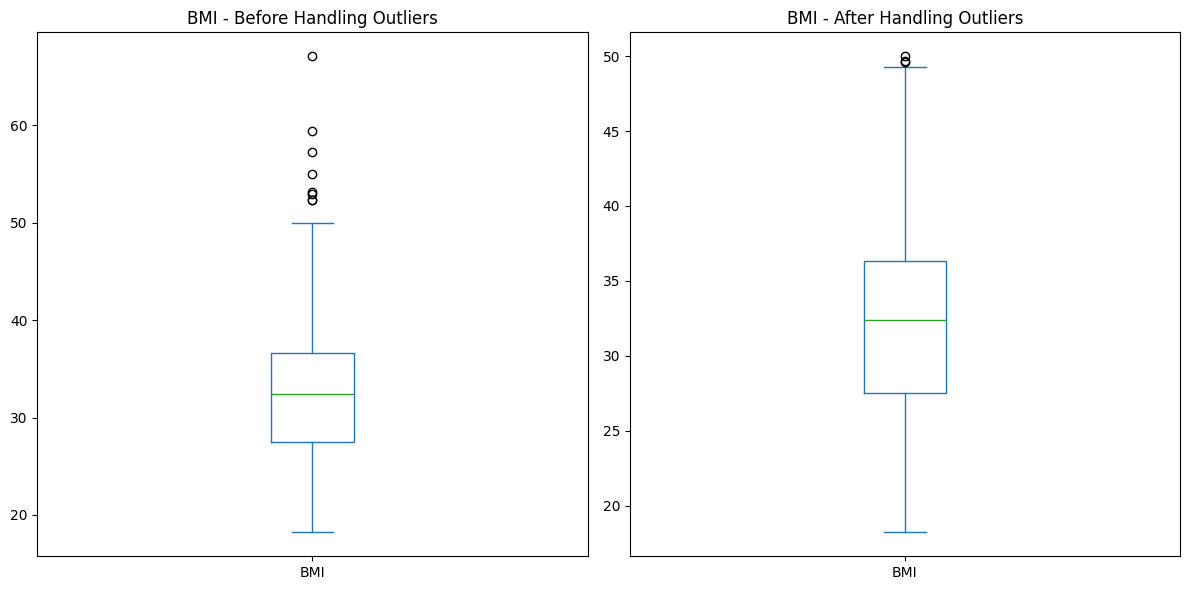

DiabetesPedigreeFunction  :: Outliers ::   [2.288, 1.441, 1.39, 1.893, 1.781, 1.222, 1.4, 1.321, 1.224, 2.329, 1.318, 1.213, 1.353, 1.224, 1.391, 1.476, 2.137, 1.731, 1.268, 1.6, 2.42, 1.251, 1.699, 1.258, 1.282, 1.698, 1.461, 1.292, 1.394]


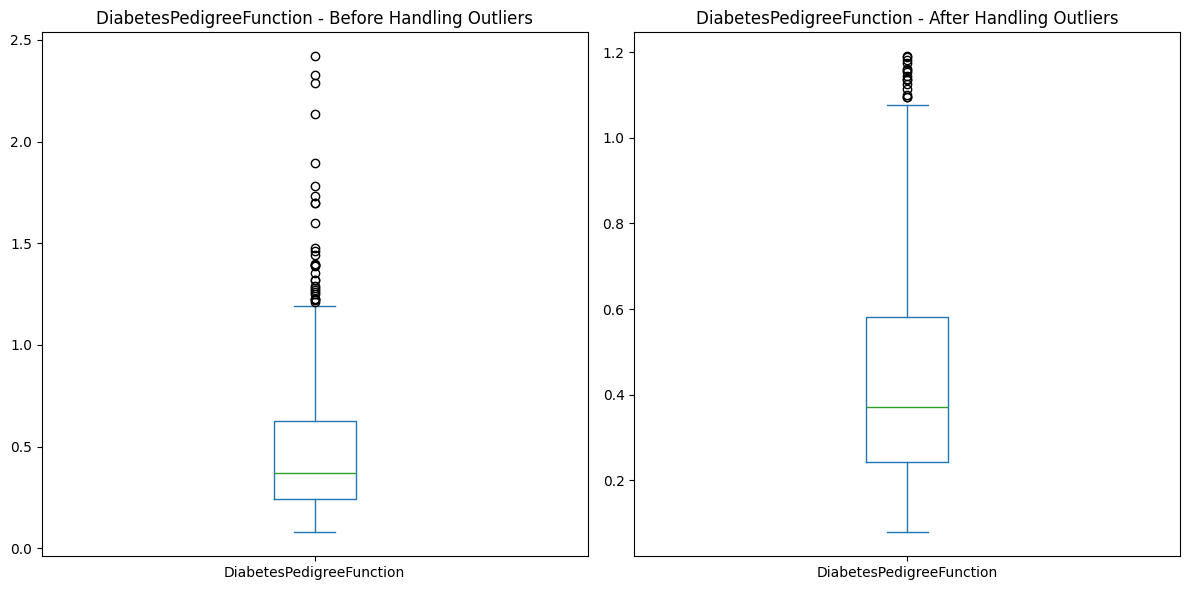

Age                       :: Outliers ::   [69, 67, 72, 81, 67, 67, 70, 68, 69]


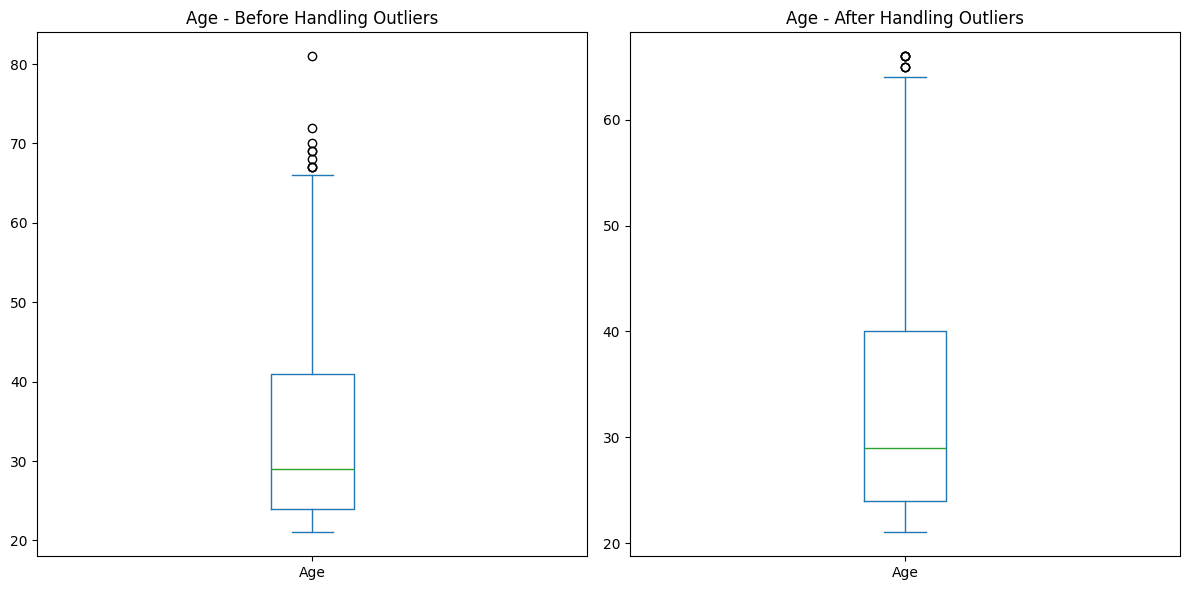

In [293]:
for feature in diabetic_df.columns:
    df = diabetic_df.copy()
    outliers_ = IQR_outliers(df, feature)
    print(f"{feature:<25} :: Outliers ::   {outliers_}")
    handle_outliers(df, feature, outliers_)

---

## *Handling Outliers by Flooring and Capping*

---

In [294]:
def handle_outliers_ft(df, feature):
    # Plot boxplot before treatment
    plt.figure(figsize=(12, 6))
    
    # Before treatment
    plt.subplot(1, 2, 1)
    plt.boxplot(df[feature].dropna())
    plt.title(f'Boxplot Before Treatment ({feature})')
    plt.xlabel(feature)
    
    # Calculate percentiles
    tenth_percentile = np.percentile(df[feature], 10)
    ninetieth_percentile = np.percentile(df[feature], 90)
    
    # Replace values below the 10th percentile
    df.loc[df[feature] < tenth_percentile, feature] = tenth_percentile
    
    # Replace values above the 90th percentile
    df.loc[df[feature] > ninetieth_percentile, feature] = ninetieth_percentile
    
    # After treatment
    plt.subplot(1, 2, 2)
    plt.boxplot(df[feature].dropna())
    plt.title(f'Boxplot After Treatment ({feature})')
    plt.xlabel(feature)
    
    plt.tight_layout()
    plt.show()

    return df

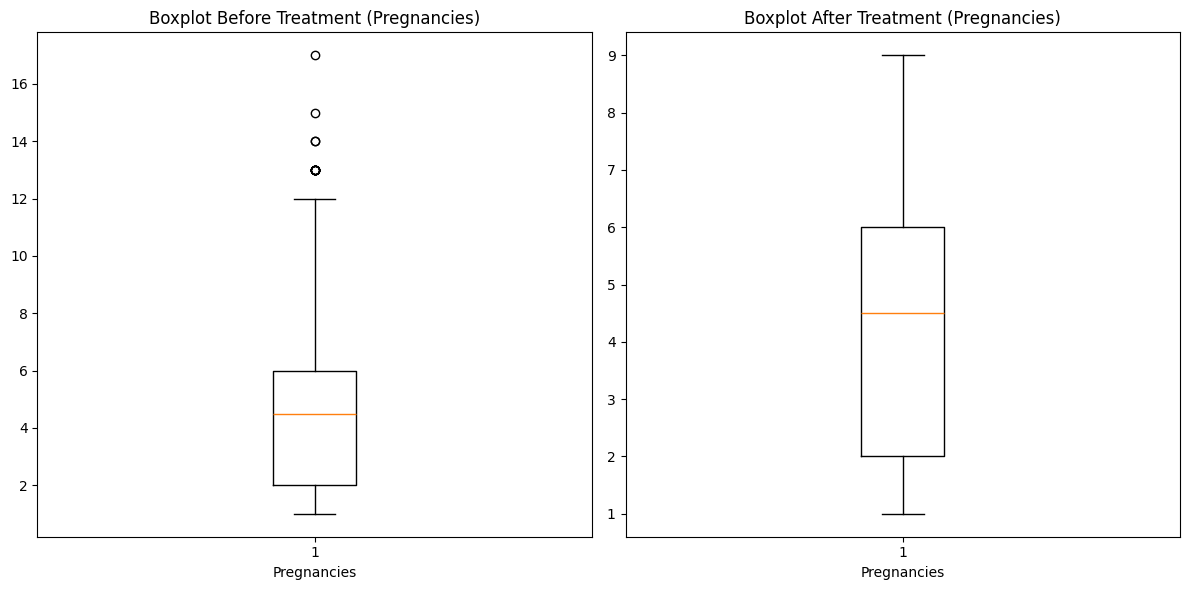

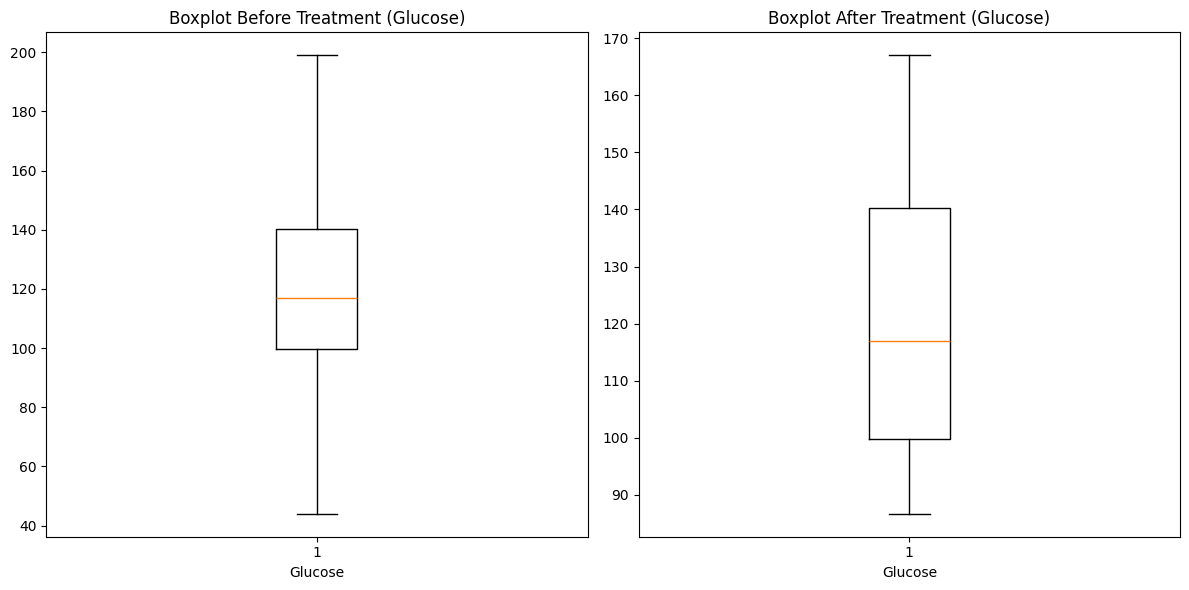

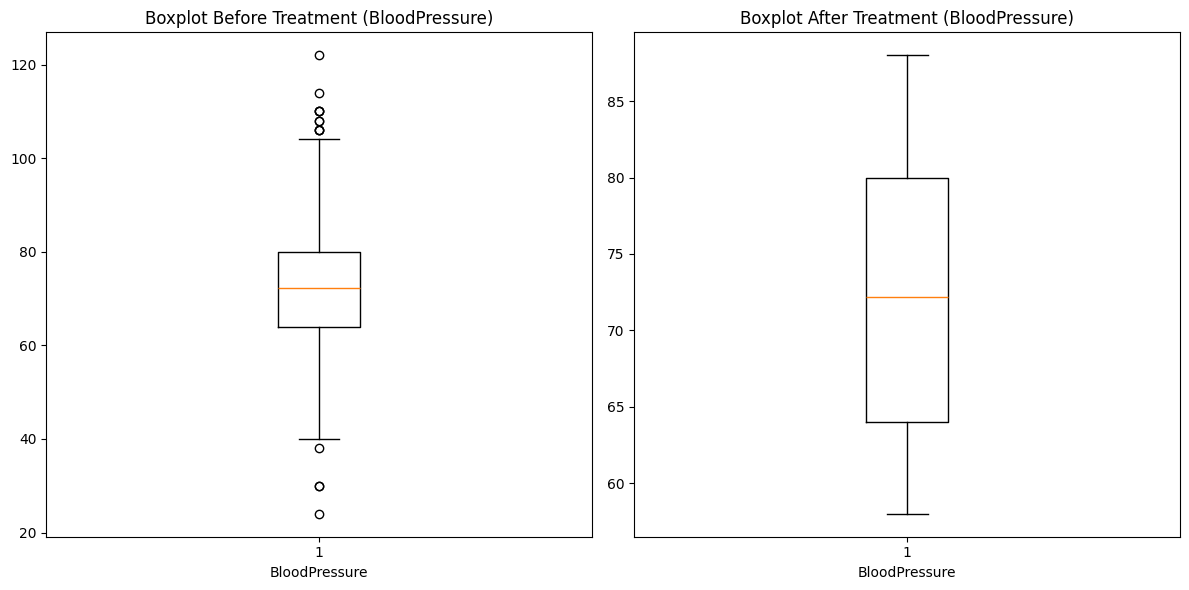

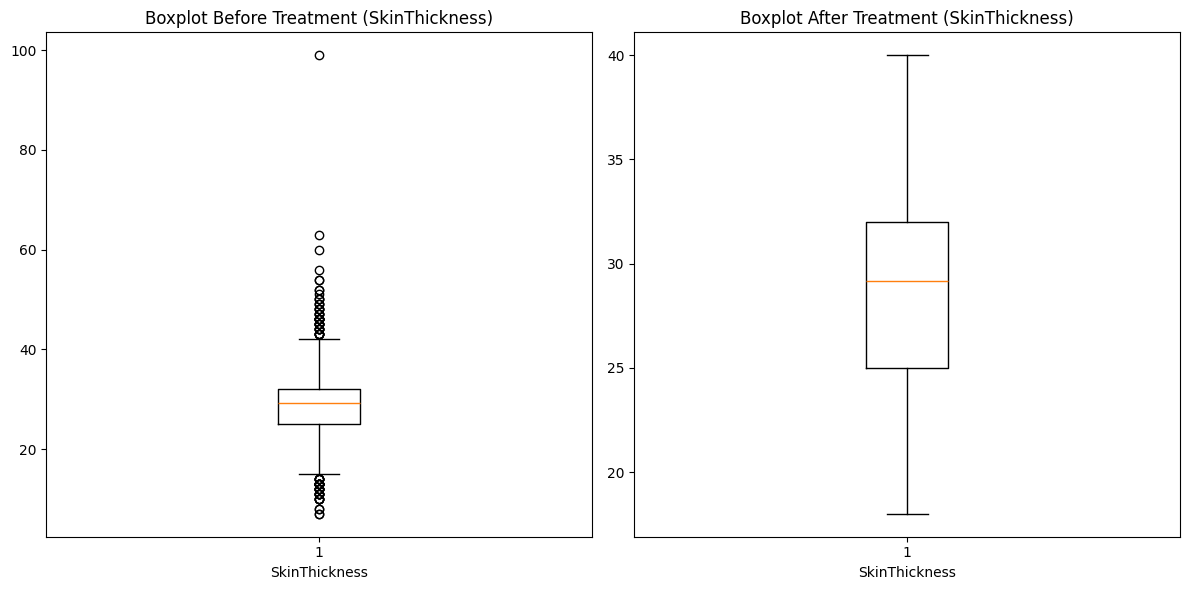

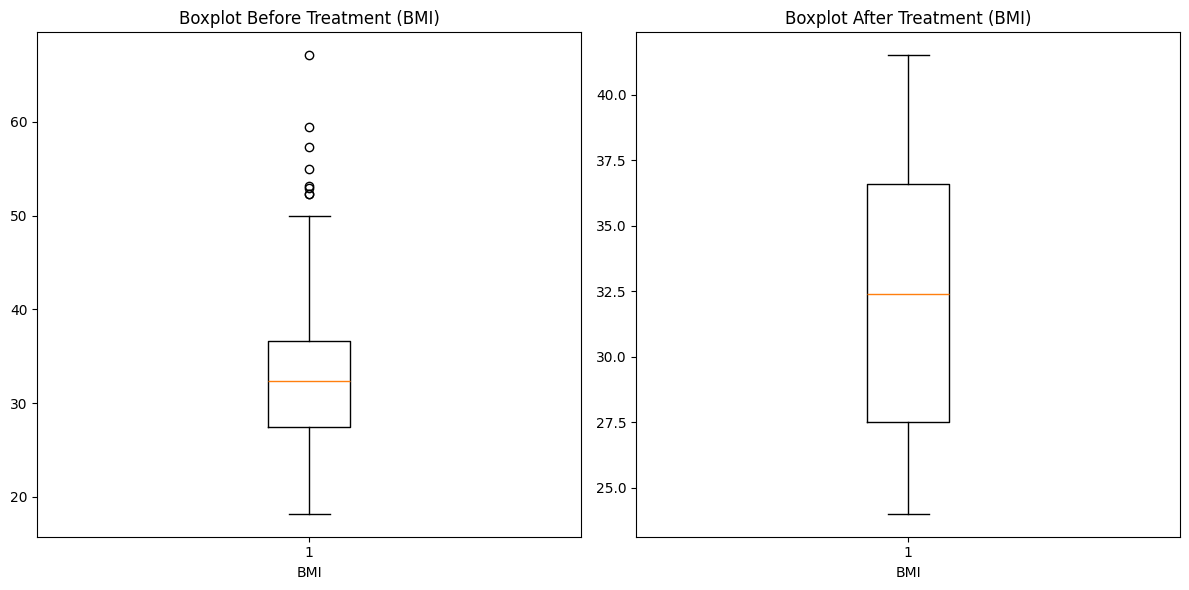

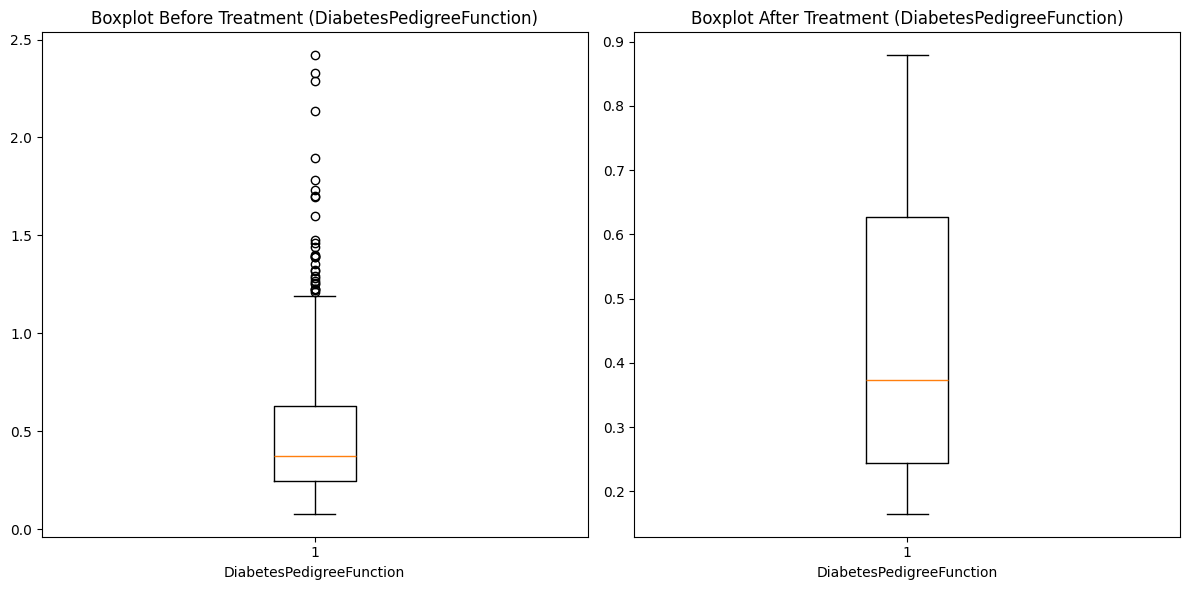

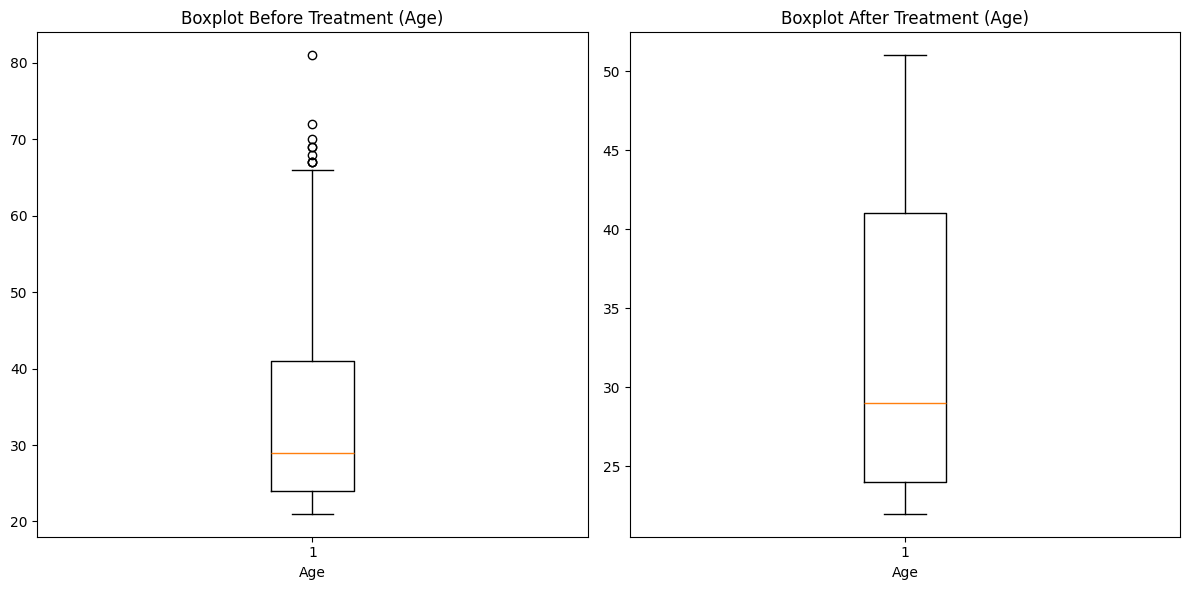

In [295]:
for feature in diabetic_df.columns:
    df2 = diabetic_df.copy()
    handle_outliers_ft(df2, feature)